In [21]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string

In [22]:
df = pd.read_csv(r"D:\project\Datasets\Email_classification\spam.csv",encoding='cp1252')

In [23]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis = 1,inplace=True)

In [25]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [28]:
df['labels'] = df['labels'].map({'ham': 0, 'spam': 1})
df.head()

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
totalMails = 4825 + 747
trainIndex, testIndex = list(), list()
for i in range(df.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = df.loc[trainIndex]
testData = df.loc[testIndex]

In [30]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,FreeMsg Hey there darling it's been 3 week's n...
3,1,WINNER!! As a valued network customer you have...
4,1,Had your mobile 11 months or more? U R entitle...


In [31]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,labels,message
0,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,U dun say so early hor... U c already then say...
2,0,"Nah I don't think he goes to usf, he lives aro..."
3,0,Even my brother is not like to speak with me. ...
4,0,As per your request 'Melle Melle (Oru Minnamin...


In [32]:
trainData['labels'].value_counts()

0    3644
1     583
Name: labels, dtype: int64

In [33]:
testData['labels'].value_counts()

0    1181
1     164
Name: labels, dtype: int64

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [35]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

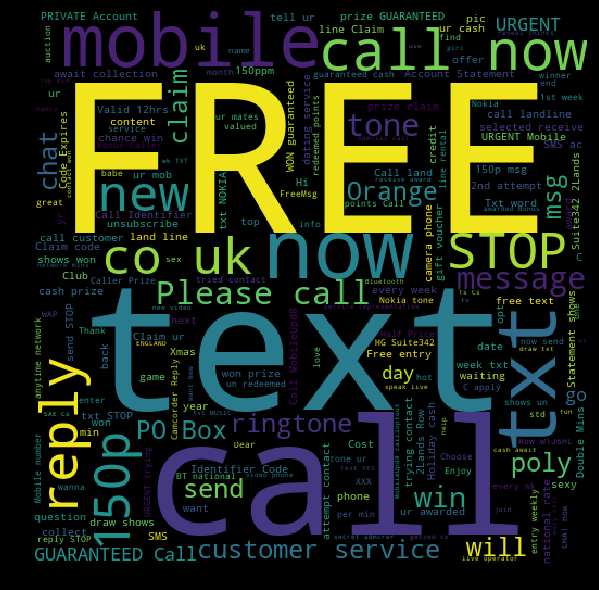

In [36]:
spam_words = ' '.join(list(df[df['labels'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

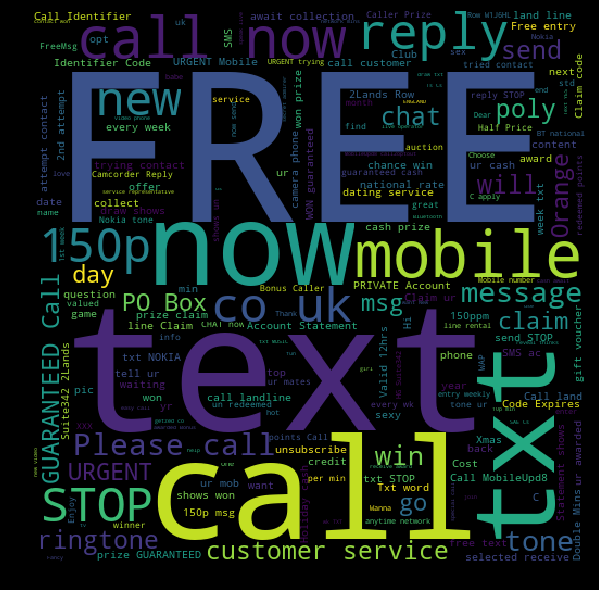

In [37]:
ham_words = ' '.join(list(df[df['labels'] == 0]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [38]:
def process_message(message, lower_case = True, stem = False, stop_words = True, gram = False,lemmi = True):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words] 
    if lemmi:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
    return words

In [39]:
df['message'].head().apply(process_message)

0    [jurong, point, crazy.., available, bugis, gre...
1                    [lar, ..., joking, wif, oni, ...]
2    [free, entry, wkly, comp, win, cup, final, tkt...
3       [dun, say, early, hor, ..., already, say, ...]
4     [nah, n't, think, go, usf, life, around, though]
Name: message, dtype: object

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()#analyzer=process_message.
bow_transformer = vectorizer.fit(df['message'])

In [71]:
message4 = 'hello world hello hello world play' #df['text'][3]
message5 = 'test test test test one hello'
message6 = 'trying to understand how this is woking and all this trying the'


#Convert a collection of text documents to a matrix of token counts
bow4 =  CountVectorizer(analyzer=process_message).fit_transform([message6])
print(bow4)
print("....................................now without using our analyzer")
bow4 =  CountVectorizer().fit_transform([message6])
print(bow4)

  (0, 2)	1
  (0, 1)	1
  (0, 0)	2
....................................now without using our analyzer
  (0, 4)	1
  (0, 0)	1
  (0, 1)	1
  (0, 9)	1
  (0, 3)	1
  (0, 5)	2
  (0, 2)	1
  (0, 8)	1
  (0, 6)	1
  (0, 7)	2


In [52]:
messages_bow = bow_transformer.transform(df['message'])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['labels'], test_size = 0.20, random_state = 0)

In [54]:
messages_bow.shape

(5572, 8673)

In [55]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
print(classifier.predict(X_train))

#Print the actual values
print(y_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [57]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      3876
          1       0.99      0.96      0.98       581

avg / total       0.99      0.99      0.99      4457

Confusion Matrix: 
 [[3870    6]
 [  22  559]]

Accuracy:  0.9937177473636976


In [58]:


#Print the predictions
print('Predicted value: ',classifier.predict(X_test))

#Print Actual Label
print('Actual value: ',y_test.values)

Predicted value:  [0 0 0 ... 0 0 0]
Actual value:  [0 0 0 ... 0 0 0]


In [59]:

#Evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))

print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       949
          1       0.94      0.95      0.94       166

avg / total       0.98      0.98      0.98      1115

Confusion Matrix: 
 [[939  10]
 [  9 157]]

Accuracy:  0.9829596412556054
